<a href="https://colab.research.google.com/github/vnicula/ai-research-code/blob/master/algorithms/simple_sgd_1_unit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

(1000, 2) (1000, 1)


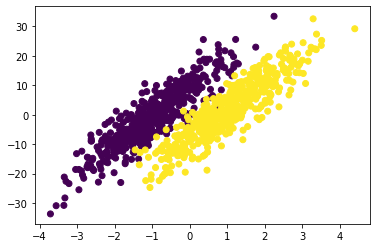

In [2]:
NUM_TRAIN_SAMPLES = 1000
samples_neg = np.random.multivariate_normal([-1., -1.], [[1, 9],[9, 100]], NUM_TRAIN_SAMPLES // 2)
samples_pos = np.random.multivariate_normal([1., 1.], [[1, 9],[9, 100]], NUM_TRAIN_SAMPLES // 2)

X_train = np.concatenate([samples_neg, samples_pos])
Y_train = np.expand_dims(np.concatenate([np.zeros(NUM_TRAIN_SAMPLES // 2), np.ones(NUM_TRAIN_SAMPLES // 2)]), 1)
print(X_train.shape, Y_train.shape)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)

In [17]:
def init_weights():
  W1 = np.random.uniform(low=-.25, high=.25, size=[2, 1])
  B1 = np.random.uniform(low=-.25, high=.25)
  return W1, B1


In [4]:
def sigmoid(z):
  return 1. / (1. + np.exp(-z))

def forward_pass(X, W1, B1):
  Z = X.dot(W1) + B1
  O = sigmoid(Z)
  return Z, O


In [5]:
def loss(Y, Yh):
  Yh_p = -Y * np.log(Yh)
  Yh_n = -(1.-Y) * np.log(1.-Yh)
  return Yh_p + Yh_n


In [6]:
def backward_pass(X, Y, W1, B1, Z, O):
  # dL_W1 = dL_O * dO_Z * dZ_W1, shape (m, 1)
  dL_O = -Y/O + (1-Y)/(1-O)
  # print(dL_O)
  dO_Z = sigmoid(Z)*(1. - sigmoid(Z))
  # print(dO_Z)
  dZ_W = X
  # print(dZ_W)
  dZ_B = 1.
  gW = dL_O * dO_Z * dZ_W
  # print(gW)
  gB = dL_O * dO_Z
  # print("gB: ", gB)
  return gW, gB

# backward_pass(X_train[:10], Y_train[:10], W1, B1, Z, O)

In [12]:
def train(X, Y, W1, B1, lr, steps):
  for i in range(steps):
    # print(W1)
    Z, O = forward_pass(X, W1, B1)
    if i % 100 == 0:
      print("Loss: ", loss(Y, O).mean())
    gW1, gB1 = backward_pass(X, Y, W1, B1, Z, O)
    # print(gW1.mean(axis=0).T)
    # print(gB1.mean(axis=0).T)
    W1 = W1 - lr * gW1.mean(axis=0, keepdims=True).T
    B1 = B1 - lr * gB1.mean(axis=0).T
  return W1, B1


In [18]:
W, B = init_weights()
W, B = train(X_train, Y_train, W, B, 0.1, 2000)

Loss:  0.8467638130615847
Loss:  0.19463098870203696
Loss:  0.13385167746115045
Loss:  0.10961583640825678
Loss:  0.0962717542047645
Loss:  0.08771430514260983
Loss:  0.08171247071898652
Loss:  0.07724717770035136
Loss:  0.0737831242804719
Loss:  0.07101062516572305
Loss:  0.06873734386256536
Loss:  0.06683713883873865
Loss:  0.06522363190222606
Loss:  0.06383556174543874
Loss:  0.06262819838395475
Loss:  0.061568071956829964
Loss:  0.0606296083733256
Loss:  0.05979290993493772
Loss:  0.05904224902806972
Loss:  0.05836502014515134


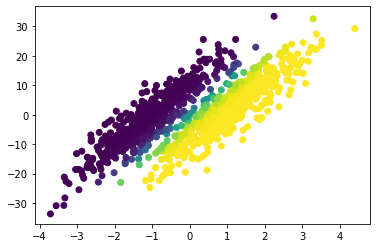

In [19]:
_, X_pred = forward_pass(X_train, W, B)
plt.scatter(X_train[:, 0], X_train[:, 1], c=X_pred)